# Testing the OccAutoencoder

1. Build the DeepAutoencoder
2. Build the OccAutoencoder as decorator for DeepAutoencoder
3. Set input data to fetch reconstructed with synthetic data
4. Set validation data and test accuracy

In [1]:
%matplotlib inline

# Import necessary libraries
import sys
sys.path.append("../pyanomaly/lib")
from deep_autoencoder import DeepAutoencoder
from occ_autoencoder import OccAutoencoder

import pandas as pd
import random
import numpy as np

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
# The configuration for the autoencoder
config = {
    "input_size": 44,
    "o_activation": "sigmoid",
    "h_activation": "relu",
    "optimizer": {
        "name": "adam",
        "learning_rate": 0.001,
        "momentum": 0.0,
        "decay": 0.0
    },
    "encoding_layers": [
        { "size": 44, "activation": "relu", "bias": 1.0 },
        { "size": 33, "activation": "relu", "bias": 1.0 }
    ],
    "decoding_layers": [
        { "size": 33, "activation": "relu", "bias": 1.0 },
        { "size": 44, "activation": "sigmoid", "bias": 1.0 }
    ],
    "epochs": 300,
    "loss": "mse",
    "bias": 1.0,
    "batch_size": 10
}

autoencoder = DeepAutoencoder(config)
autoencoder.compile()
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 33)                1485      
_________________________________________________________________
sequential_1 (Sequential)    (None, 44)                1496      
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 33)                1485      
Total params: 1,485
Trainable params: 1,485
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 

In [3]:
#input_file = "../pyanomaly/data/magic04_normalized_gamma.csv"
#model_file = "../pyanomaly/models/gamma.h5"

input_file = "../pyanomaly/data/heart_normalized.csv"
model_file = "../pyanomaly/models/heart.h5"

input_data = pd.read_csv(input_file)
input_data_no_labels = input_data.drop(['y'], axis=1)

autoencoder.train(input_data_no_labels)
autoencoder.save(model_file)

Epoch 1/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0445 - acc: 0.0375
Epoch 2/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0249 - acc: 0.0562
Epoch 3/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0237 - acc: 0.0599
Epoch 4/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0230 - acc: 0.0524
Epoch 5/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0223 - acc: 0.0487
Epoch 6/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0215 - acc: 0.0562
Epoch 7/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0207 - acc: 0.0487
Epoch 8/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0198 - acc: 0.0524
Epoch 9/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0189 - acc: 0.0712
Epoch 10/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0180 - acc: 0.0712
Epoch 11/300
27/27 [==============================] - 0s 4m

27/27 [==============================] - 0s 6ms/step - loss: 0.0042 - acc: 0.1723
Epoch 88/300
27/27 [==============================] - 0s 4ms/step - loss: 0.0041 - acc: 0.1610
Epoch 89/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0041 - acc: 0.1985
Epoch 90/300
27/27 [==============================] - 0s 4ms/step - loss: 0.0041 - acc: 0.1948
Epoch 91/300
27/27 [==============================] - 0s 4ms/step - loss: 0.0040 - acc: 0.1948
Epoch 92/300
27/27 [==============================] - 0s 3ms/step - loss: 0.0040 - acc: 0.1873
Epoch 93/300
27/27 [==============================] - 0s 4ms/step - loss: 0.0039 - acc: 0.1835
Epoch 94/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0039 - acc: 0.1873
Epoch 95/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0039 - acc: 0.1910
Epoch 96/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0038 - acc: 0.2060
Epoch 97/300
27/27 [==============================] - 0s 5ms/st

27/27 [==============================] - 0s 6ms/step - loss: 0.0023 - acc: 0.2809
Epoch 173/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0023 - acc: 0.2996
Epoch 174/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0023 - acc: 0.3109
Epoch 175/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0023 - acc: 0.3146
Epoch 176/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0023 - acc: 0.2921
Epoch 177/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0023 - acc: 0.2772
Epoch 178/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0022 - acc: 0.3146
Epoch 179/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0023 - acc: 0.3221
Epoch 180/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0022 - acc: 0.3034
Epoch 181/300
27/27 [==============================] - 0s 4ms/step - loss: 0.0022 - acc: 0.2996
Epoch 182/300
27/27 [==============================] -

27/27 [==============================] - 0s 5ms/step - loss: 0.0016 - acc: 0.3483
Epoch 258/300
27/27 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 0.3521
Epoch 259/300
27/27 [==============================] - 0s 5ms/step - loss: 0.0016 - acc: 0.3596
Epoch 260/300
27/27 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 0.3633
Epoch 261/300
27/27 [==============================] - 0s 3ms/step - loss: 0.0016 - acc: 0.3521
Epoch 262/300
27/27 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 0.3633
Epoch 263/300
27/27 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 0.3820
Epoch 264/300
27/27 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 0.3408
Epoch 265/300
27/27 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 0.3670
Epoch 266/300
27/27 [==============================] - 0s 3ms/step - loss: 0.0016 - acc: 0.3820
Epoch 267/300
27/27 [==============================] -

## Build the OccAutoencoder

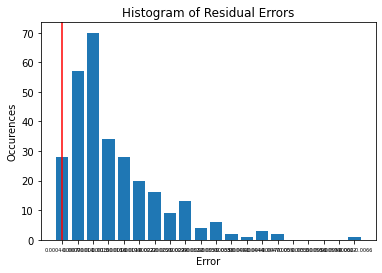

In [4]:
occ_autoencoder = OccAutoencoder(autoencoder, 10000, 11)

occ_autoencoder.build(input_data_no_labels)

occ_autoencoder.render()

In [5]:
print("Optimal Threshold:",occ_autoencoder.optimal_threshold)
print(occ_autoencoder.bins)

Optimal Threshold: 0.00239575010860576
[0.00039261 0.00070078 0.00100896 0.00131713 0.00162531 0.00193349
 0.00224166 0.00254984 0.00285801 0.00316619 0.00347437 0.00378254
 0.00409072 0.00439889 0.00470707 0.00501524 0.00532342 0.0056316
 0.00593977 0.00624795 0.00655612]


## Validate Synthetic Anomalies
Predict synthetic anomalies used to build model.

In [6]:
predictions = np.array(occ_autoencoder.predict(occ_autoencoder.synthetic_data))
print("Rate of Anomalies for Synthetic Data:", len(predictions[predictions == 1]) / len(predictions))

Rate of Anomalies for Synthetic Data: 0.7037037037037037


## Validate Normal Data
Predict anomalies from normal data used to build model

In [7]:
predictions = np.array(occ_autoencoder.predict(input_data_no_labels))
print("Rate of Anomalies for Normal Data:", len(predictions[predictions == 1]) / len(predictions))

Rate of Anomalies for Normal Data: 0.10861423220973783
